<a href="https://colab.research.google.com/github/dongyyyyy/ColabDeepLearning/blob/master/MakingDeepLearningModelUsingNumpy/tensorflowExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 0
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 1
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 2
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 3
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 5
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 7
    noise = np.random.normal(0, 0.1, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [0]:
import numpy as np
import csv

def createRandomArray():
    result = np.random.randint(0,2,3,dtype=int)
    if(result[0]==0 and result[1]==0 and result[2] ==0):
        output = 0
    elif(result[0]==0 and result[1]==0 and result[2] == 1):
        output = 1
    elif(result[0]==0 and result[1]==1 and result[2] ==0):
        output = 2
    elif (result[0] == 0 and result[1] == 1 and result[2] == 1):
        output = 3
    elif (result[0] == 1 and result[1] == 0 and result[2] == 0):
        output = 4
    elif (result[0] == 1 and result[1] == 0 and result[2] == 1):
        output = 5
    elif (result[0] == 1 and result[1] == 1 and result[2] == 0):
        output = 6
    elif (result[0] == 1 and result[1] == 1 and result[2] == 1):
        output = 7
    noise = np.random.normal(0, 0.3, 3)
    result = result - noise
    return result , output

if __name__ == "__main__":
    saveData = []
    csvfile = open("TrainDataset_03.csv","w",newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(20000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

    csvfile = open("TestDataset_03.csv", "w", newline="")
    csvwriter = csv.writer(csvfile)

    for i in range(1000):
        array,output = createRandomArray()
        output = np.reshape(output,(1))
        result = np.concatenate([array,output],axis=-1)
        csvwriter.writerow(result)

    csvfile.close()

In [27]:
!ls

sample_data	    TestDataset.csv	 TrainDataset.csv
TestDataset_03.csv  TrainDataset_03.csv


In [0]:
import numpy as np

def HandFunction(h,f):
    result = np.array(np.zeros([len(h[0]), len(f[0])]))
    h = h.sum(axis=0)
    f = f.sum(axis=0)
    for i in range(len(h)):
        for j in range(len(f)):
            result[i][j] = h[i] * f[j]
    return result

def HandFunction1(h,f):
    result = np.array(np.zeros([len(f),len(f[0])]))
    for i in range(len(f)): # 100
        for j in range(len(f[0])): # 24
            result[i][j] = h[j] * f[i][j] # 24 , (100,24) -> (100,24)
    return result

def HandFunction2(h,f):
    result = np.array(np.zeros([len(h),len(f[0])]))
    for i in range(len(f[0])): # 24
        for j in range(len(h)): # 100
            result[j][i] = h[j] * f[j][i] # (100) , (100,24) -> (100,24)
    return result


def ODivideFunction(h,f):
    result = np.array(np.zeros([len(h), len(h[0])]))
    for i in range(len(h)): # 100
        for j in range(len(h[0])): # 8
            result[i][j] = h[i][j] / f[i]
    return result

def MakeFristOne(h):
    for i in range(len(h)):
        h[i][0] = 1.
    return h
  
def RetrunOneHot(input):
        if input == 0:
            return [1, 0, 0, 0, 0, 0, 0, 0]
        elif input == 1:
            return [0, 1, 0, 0, 0, 0, 0, 0]
        elif input == 2:
            return [0, 0, 1, 0, 0, 0, 0, 0]
        elif input == 3:
            return [0, 0, 0, 1, 0, 0, 0, 0]
        elif input == 4:
            return[0, 0, 0, 0, 1, 0, 0, 0]
        elif input == 5:
            return [0, 0, 0, 0, 0, 1, 0, 0]
        elif input == 6:
            return [0, 0, 0, 0, 0, 0, 1, 0]
        elif input == 7:
            return [0, 0, 0, 0, 0, 0, 0, 1]
        else :
          return [0, 0, 0, 0, 0, 0, 0, 0]

In [86]:
import numpy as np
from math import exp

learning_rate = 0.001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid


def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu


def V_ReLU_back():
    relu = np.vectorize(ReLU_back)
    return relu


def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


def ReLU_back(x):
    if x > 0:
        return 1
    else:
        return 0


if __name__ == "__main__":

    batch = 100
    epoch = 20
    startNumber = 0

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data))]
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1)
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []
    print("은닉층이 0개인 classification ( 활성함수 : ReLU activation function)")
    print("데이터 총 개수 : ", len(train_y_data))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))

    W = np.random.rand(4,8)
    # print(W1)
    v_relu = V_ReLU()
    v_relu_back = V_ReLU_back()
    z1 = np.random.rand(batch, 8)

    def forward(x, y):

        z1 = np.dot(x,W)
        h1 = v_relu(z1)
        o = ODivideFunction(np.exp(h1), np.sum(np.exp(h1), axis=1))
        e = np.mean(-np.sum(y * np.log(o), axis=1))

        return e, o


    def backward(x, y, W, input_data):
        local_param = (x-y) # 100, 8

        func1 = v_relu_back(z1) # 100 8
        local_param = z1 * local_param
        result = np.dot(np.transpose(input_data),local_param) # 100 4 , 100 8
        delta_o = (-learning_rate)*result
        NW = W + delta_o

        return NW

    def Accuracy(x,y,batch):
        z1 = np.dot(x,W)
        h1 = v_relu(z1)
        o = ODivideFunction(np.exp(h1), np.sum(np.exp(h1), axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
        return accuracy/batch * 100

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]

            if (len(x_batch) != 0):
                Eav, error = forward(x_batch, y_batch)
                W = backward(error, y_batch, W,x_batch)

                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = Accuracy(x_batch,y_batch,batch)
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {}%".format((Aavg/len(test_x_data_bias))))

은닉층이 0개인 classification ( 활성함수 : ReLU activation function)
데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.7963364673151707
Epoch  2 Eavg :  1.3559807838664517
Epoch  3 Eavg :  1.1335439317103857
Epoch  4 Eavg :  0.9926940269573822
Epoch  5 Eavg :  0.894771242625912
Epoch  6 Eavg :  0.8240054271923027
Epoch  7 Eavg :  0.7695471131201126
Epoch  8 Eavg :  0.7272336760412521
Epoch  9 Eavg :  0.691536793412177
Epoch  10 Eavg :  0.6633488739199129
Epoch  11 Eavg :  0.6392628745782983
Epoch  12 Eavg :  0.6184912535393006
Epoch  13 Eavg :  0.6006317383686596
Epoch  14 Eavg :  0.584718929949613
Epoch  15 Eavg :  0.5707752563904838
Epoch  16 Eavg :  0.5582941472150202
Epoch  17 Eavg :  0.5485179976639204
Epoch  18 Eavg :  0.5386059068684039
Epoch  19 Eavg :  0.5302433277703694
Epoch  20 Eavg :  0.5219488502073104
Aavg : 0.8513%


In [84]:
import numpy as np
from math import exp

learning_rate = 0.001


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid


def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu


def V_ReLU_back():
    relu = np.vectorize(ReLU_back)
    return relu


def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


def ReLU_back(x):
    if x > 0:
        return 1
    else:
        return 0


if __name__ == "__main__":

    batch = 100
    epoch = 20
    startNumber = 0

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data))]
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1)
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []
    print("은닉층이 0개인 classification ( 활성함수 : linear activation function( y = x ))")
    print("데이터 총 개수 : ", len(train_y_data))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))

    W = np.random.rand(4,8)
    # print(W1)
    v_relu = V_ReLU()
    v_relu_back = V_ReLU_back()
    z1 = np.random.rand(batch, 8)

    def forward(x, y):

        z1 = np.dot(x,W)
        h1 = v_relu(z1)
        o = ODivideFunction(np.exp(h1), np.sum(np.exp(h1), axis=1))
        e = np.mean(-np.sum(y * np.log(o), axis=1))

        return e, o


    def backward(x, y, W, input_data):
        local_param = (x-y) # 100, 8

        func1 = v_relu_back(z1) # 100 8
        local_param = func1 * local_param
        result = np.dot(np.transpose(input_data),local_param) # 100 4 , 100 8
        delta_o = (-learning_rate)*result
        NW = W + delta_o

        return NW

    def Accuracy(x,y,batch):
        z1 = np.dot(x,W)
        h1 = v_relu(z1)
        o = ODivideFunction(np.exp(h1), np.sum(np.exp(h1), axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
        return accuracy/batch * 100

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]

            if (len(x_batch) != 0):
                Eav, error = forward(x_batch, y_batch)
                W = backward(error, y_batch, W,x_batch)

                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = Accuracy(x_batch,y_batch,batch)
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {}%".format((Aavg/len(test_x_data_bias))))

은닉층이 0개인 classification ( 활성함수 : linear activation function( y = x ))
데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.6243106769423938
Epoch  2 Eavg :  1.0810612176230174
Epoch  3 Eavg :  0.8662826222518413
Epoch  4 Eavg :  0.7486994885979661
Epoch  5 Eavg :  0.6758859094072589
Epoch  6 Eavg :  0.6267734507123945
Epoch  7 Eavg :  0.5895518082259169
Epoch  8 Eavg :  0.5619836057557097
Epoch  9 Eavg :  0.5401395186610745
Epoch  10 Eavg :  0.5232762273990043
Epoch  11 Eavg :  0.508685982727892
Epoch  12 Eavg :  0.4964675693778687
Epoch  13 Eavg :  0.4860939088009597
Epoch  14 Eavg :  0.47644775852680354
Epoch  15 Eavg :  0.46768347792079334
Epoch  16 Eavg :  0.4604649223262898
Epoch  17 Eavg :  0.45370660779657407
Epoch  18 Eavg :  0.44982033267938903
Epoch  19 Eavg :  0.44530287059598955
Epoch  20 Eavg :  0.44136848839215537
Aavg : 0.85005%


In [85]:
import numpy as np
from math import exp

# Two layer Classification
 
learning_rate = 0.0002


def V_Sigmoid():
    sigmoid = np.vectorize(Sigmoid)
    return sigmoid


def V_ReLU():
    relu = np.vectorize(ReLU)
    return relu


def V_ReLU_back():
    relu = np.vectorize(ReLU_back)
    return relu


def Sigmoid(x):
    try:
        return 1 / (1 + exp(-x))
    except OverflowError:
        return 1.


def ReLU(x):
    return max(0, x)


def ReLU_back(x):
    if x > 0:
        return 1
    else:
        return 0


if __name__ == "__main__":

    batch = 100
    epoch = 15
    startNumber = 0

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data))]
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1)
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []
    print('은닉층이 1개인 classification (활성함수 : ReLU activation function)')
    print("데이터 총 개수 : ", len(train_y_data))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))

    W1 = np.random.rand(4,24)
    W2 = np.random.rand(24, 8)
    # print(W1)
    v_relu = V_ReLU()
    v_relu_back = V_ReLU_back()
    z1 = np.random.rand(batch, 24)
    h1 = np.random.rand(batch,24)
    z2 = np.random.rand(batch, 8)
    def forward(x, y):
        z1 = np.dot(x,W1)
        z1 = MakeFristOne(z1)
        h1 = v_relu(z1)

        z2 = np.dot(h1, W2)
        z2 = MakeFristOne(z2)

        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2), axis=1))
        e = np.mean(-np.sum(y * np.log(o), axis=1))

        return e, o


    def backward(x, y, input_data):
        local_param2 = (x-y) # 100, 8
        result = np.dot(np.transpose(h1),local_param2) # 24 100 , 100 8
        delta_o = (-learning_rate)*result # 24 8
        NW2 = W2 + delta_o

        local_param1 = np.dot(local_param2, np.transpose(W2))# 100 8 8 24 -> 100 24
        func1 = v_relu_back(z1) # 100 24
        local_param1 = local_param1 * func1 # 100 24
        result = np.dot(np.transpose(input_data),local_param1) # 4 100 100 24
        delta_h1 = (-learning_rate) * result  # W1 변화량
        NW1 = W1 + delta_h1  # 다음 W1 = 현재 W1 + W1의 변화량

        return NW2, NW1

    def Accuracy(x,y,batch):
        z1 = np.dot(x, W1)
        z1 = MakeFristOne(z1)
        h1 = v_relu(z1)

        z2 = np.dot(h1, W2)
        z2 = MakeFristOne(z2)

        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2), axis=1))
        accuracy = 0.
        for i in range(batch):
            if (np.argmax(o[i])==np.argmax(y[i])):
                accuracy = accuracy + 1.
        return accuracy/batch * 100

    maxBatch = int(len(train_x_data_bias) / batch)
    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]

            if (len(x_batch) != 0):
                Eav, error = forward(x_batch, y_batch)
                W2, W1 = backward(error, y_batch,x_batch)
                #print("W1[0]:",W1[0])
                #print("W2[0]:", W2[0])

                # print(W1)
                Eavg = Eavg + Eav
                startNumber = startNumber + 100
            else:
                break
        print("Epoch ",i+1,"Eavg : ",Eavg/maxBatch)

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data = data[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, train_x_data), axis=1)
    test_y_data = data[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    Eavg = 0.
    startNumber = 0
    Aavg = 0.
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = Accuracy(x_batch,y_batch,batch)
            Aavg = Aavg + accuracy
            startNumber = startNumber + 100
    print("Aavg : {}%".format((Aavg/len(test_x_data_bias))*100))

은닉층이 1개인 classification (활성함수 : ReLU activation function)
데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  2.5857428255685146
Epoch  2 Eavg :  2.3095195188938
Epoch  3 Eavg :  2.357412723804773
Epoch  4 Eavg :  2.552493288824979
Epoch  5 Eavg :  2.8261515578246996
Epoch  6 Eavg :  3.123133822764712
Epoch  7 Eavg :  3.395698472892682
Epoch  8 Eavg :  3.5992875812461302
Epoch  9 Eavg :  3.6905437159278467
Epoch  10 Eavg :  3.6267981872735877
Epoch  11 Eavg :  3.3658360085611942
Epoch  12 Eavg :  2.8657478117128905
Epoch  13 Eavg :  2.0848859329469813
Epoch  14 Eavg :  1.1454113647132904
Epoch  15 Eavg :  0.947650189799659
Aavg : 74.625%


In [87]:
import numpy as np
from math import exp

#One layer Classification

learning_rate = 0.0001 # learning rate

plt_Eavg = [] 
plt_Eavg2 = []

class Model:
    def __init__(self, batch): # 클래스 생성시 초기화
        self.W1 = np.random.rand(4,24) 
        self.W2 = np.random.rand(24,8)
        self.h1 = np.random.rand(batch, 24)

    def forward(self, input_data, input_truth): # 전 방향 
        z1 = np.dot(input_data, self.W1)
        self.h1 = MakeFristOne(z1)

        z2 = np.dot(self.h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2),axis=1))
        e = np.mean(-np.sum(input_truth*np.log(o),axis=1))

        return e, o

    def backward(self, pred, truth, input_data): # x = O(n) , y = label , W = Weight / backpropagation
        local_param2 = (pred - truth) # 국부적 기울기
        result = np.dot(np.transpose(self.h1), local_param2) # 국부적 기울기 * h1
        delta_o = (-learning_rate) * result # W2 변화량
        nw2 = self.W2 + delta_o # 다음 W2 = 현재 W2 + W2의 변화량

        local_param1 = np.dot(local_param2, np.transpose(self.W2)) # 국부적 기울기
        result = HandFunction(input_data, local_param1) # 국부적 기울기 * 입력값
        delta_h1 = (-learning_rate) * result # W1 변화량
        nw1 = self.W1 + delta_h1 # 다음 W1 = 현재 W1 + W1의 변화량

        self.W1 = nw1
        self.W2 = nw2

    def Accuracy(self, input_data, input_truth, batch): # 정확도 확인을 위한 함수
        z1 = np.dot(input_data, self.W1)
        h1 = MakeFristOne(z1)

        z2 = np.dot(h1, self.W2)
        o = ODivideFunction(np.exp(z2), np.sum(np.exp(z2), axis=1))
        accuracy = 0.
        for i in range(batch):
            if np.argmax(o[i]) == np.argmax(input_truth[i]): # truth와 pred이 일치할 경우
                accuracy = accuracy + 1.

        return accuracy/batch * 100, o

if __name__ == "__main__":

    batch = 100 # mini-batch size 한번에 100개의 이미지를 학습한 후 update
    epoch = 10 # 전체의 이미지 수를 10번 만큼 반복 학습
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32) # 데이터 가져오기 
    train_x_data = data[:, 0:-1] # 맨 마지막 전까지의 데이터를 X 데이터 ( 입력 데이터 )
    bias = [[1.] * 1 for i in range(len(train_x_data))] # 입력 데이터에도 bias값 (+1)을 추가하기 위한 리스트 선언
    train_x_data_bias = np.concatenate((bias, train_x_data), axis=1) # 입력 데이터에 bias값 추가
    train_y_data = data[:, [-1]] # 마지막 데이터를 y 데이터 ( 정답 )
    train_y_data_onehot = [] # one_hot encoding을 통하여 데이터 변형

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    bias = [[1.] * 1 for i in range(len(train_x_data_03))]
    train_x_data_03_bias = np.concatenate((bias, train_x_data_03), axis=1)
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []
    print('은닉층이 1개인 classification (활성함수 : linear activation function)')

    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data_03_bias) / batch)

    m1 = Model(batch) # 클래스 생성
    m2 = Model(batch) # 클래스 생성

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복 = 20000 / batch(100)
            x_batch = train_x_data_bias[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03_bias[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                Eav, pred = m1.forward(x_batch, y_batch) # forward
                m1.backward(pred, y_batch, x_batch) # backward

                Eav2, pred2 = m2.forward(x_batch2, y_batch2)
                m2.backward(pred2, y_batch2, x_batch2)

                Eavg = Eavg + Eav
                Eavg2 = Eavg2 + Eav2
                startNumber = startNumber + 100
        print("Epoch ", i + 1, "Eavg : ", Eavg/maxBatch)
        plt_Eavg.append(Eavg/maxBatch) 
        print("Epoch ", i + 1, "Eavg2 : ", Eavg2 / maxBatch)
        plt_Eavg2.append(Eavg2/maxBatch)
    
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_bias = [[1.] * 1 for i in range(len(test_x_data))]
    test_x_data_bias = np.concatenate((test_bias, test_x_data), axis=1)
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))

    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_x_data_03_bias = np.concatenate((test_bias, test_x_data_03), axis=1)
    test_y_data_03 = test[:, [-1]]
    test_y_data_03_onehot = []

    for i in range(len(test_y_data_03)):
        test_y_data_03_onehot.append(RetrunOneHot(test_y_data_03[i]))

    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    a = 0
    for i in range(len(test_x_data_bias)): # 200번 반복
        x_batch = test_x_data_bias[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        x_batch2 = test_x_data_03_bias[startNumber:startNumber+batch]
        y_batch2 = test_y_data_03_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy, pred = m1.Accuracy(x_batch, y_batch, batch)
            accuracy2, pred2 = m2.Accuracy(x_batch2, y_batch2, batch)
            if(a == 0):
                print("Label : ", np.argmax(y_batch, axis=1))
                print("pred : ", np.argmax(pred, axis=1))
                a += 1
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2
            startNumber = startNumber + 100

    print("Aavg : {}%".format((float(Aavg)/len(test_x_data_bias))*100))

    print("Aavg2 : {:.4f}%".format((float(Aavg2) / len(test_x_data_03_bias))*100))

은닉층이 1개인 classification (활성함수 : linear activation function)
데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg :  1.6902657323047812
Epoch  1 Eavg2 :  1.8673804657649506
Epoch  2 Eavg :  1.1912616852019489
Epoch  2 Eavg2 :  1.4156899577217248
Epoch  3 Eavg :  0.8662851624768498
Epoch  3 Eavg2 :  1.1385703441088941
Epoch  4 Eavg :  0.6390035780215793
Epoch  4 Eavg2 :  0.9488542114640127
Epoch  5 Eavg :  0.48121904520935493
Epoch  5 Eavg2 :  0.816564499407352
Epoch  6 Eavg :  0.3719151446680614
Epoch  6 Eavg2 :  0.7227468848826841
Epoch  7 Eavg :  0.2952715867640827
Epoch  7 Eavg2 :  0.654716206015811
Epoch  8 Eavg :  0.24037327107884868
Epoch  8 Eavg2 :  0.6042459077110834
Epoch  9 Eavg :  0.20005978971512978
Epoch  9 Eavg2 :  0.5660064497359691
Epoch  10 Eavg :  0.16970689761566404
Epoch  10 Eavg2 :  0.5364860018835172
Label :  [7 0 0 6 2 7 0 3 7 3 1 5 1 4 5 7 0 0 0 3 5 5 1 4 3 0 2 0 7 2 1 3 5 5 6 3 5
 4 7 2 6 0 6 2 3 7 4 7 7 1 3 1 2 7 5 1 1 4 3 6 0 0 3 3 5 3 1 6 3

표준편차 0.1 & 0.3인 data의 학습 결과(Eavg)


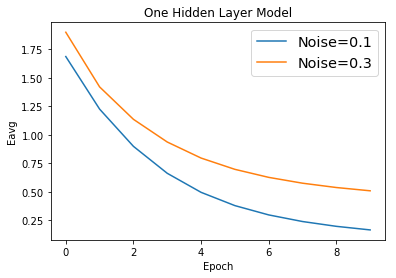

In [81]:
import matplotlib.pyplot as plt


x = range(0,10)

plt.xlabel('Epoch')
plt.ylabel('Eavg')
print("표준편차 0.1 & 0.3인 data의 학습 결과(Eavg)")
plt.title('One Hidden Layer Model')
plt.plot(x,plt_Eavg,label= "Noise=0.1")
plt.plot(x,plt_Eavg2,label = 'Noise=0.3')
plt.legend(fontsize='x-large')
plt.show()


균등분포와 정규분포 그래프


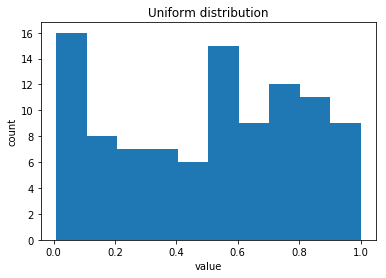

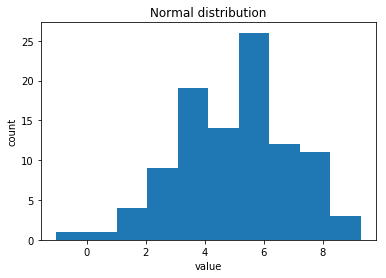

In [80]:
import tensorflow as tf
import matplotlib.pyplot as plt

uniform = tf.random_uniform([100],minval=0, maxval=1, dtype=tf.float32) # 0~1사이의 난수값인 균등 분포
normal = tf.random_normal([100],mean=5,stddev=2) # 평균값이 5이고 표준편차가 2인 정규분포

sess = tf.Session()
uniform_sess = sess.run(uniform)
normal_sess = sess.run(normal)

print("균등분포와 정규분포 그래프")

plt.title('Uniform distribution')
plt.xlabel('value')
plt.ylabel('count')
plt.hist(uniform_sess)
plt.show()

plt.title('Normal distribution')
plt.xlabel('value')
plt.ylabel('count')
plt.hist(normal_sess)
plt.show()



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate1 = 0.1
learning_rate2 = 0.01
learning_rate3 = 0.001


class Model_Grad:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name) as scope:
            self.X = tf.placeholder(tf.float32, [None, 3])
            self.Y = tf.placeholder(tf.float32, [None, 8])

            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


class Model_Adam:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name) as scope:
            self.X = tf.placeholder(tf.float32, [None, 3])  # 데이터를 저장하는 일종의 통
            self.Y = tf.placeholder(tf.float32, [None, 8])
            '''
            tf.random_normal(shape, mean=0.0, stddev=1.0, dtype=tf.float32, seed=None, name=None)
            정규분포로부터의 난수값을 반환합니다
            shape: 정수값의 1-D 텐서 또는 파이썬 배열. 반환값 텐서의 shape입니다.
            mean: 0-D 텐서 또는 dtype타입의 파이썬 값. 정규분포의 평균값.
            stddev: 0-D 텐서 또는 dtype타입의 파이썬 값. 정규분포의 표준 편차.
            dtype: 반환값의 타입.
            seed: 파이썬 정수. 분포의 난수 시드값을 생성하는데에 사용됩니다. 동작 방식은 set_random_seed를 보십시오.
            name: 연산의 명칭 (선택사항).
            반환값 : 정규 난수값들로 채워진 shape으로 정해진 텐서

            np.random.normal(0, 0.3, 3)
            mean : 0
            stddev : 0.3
            shape : 3
            와 같은 형태

            tf.random_uniform(shape, minval=0, maxval=None, dtype=tf.float32, seed=None, name=None)
            균등분포로부터의 난수값을 반환합니다
            shape: 정수값의 D-1 텐서 또는 파이썬 배열. 반환값 텐서의 shape입니다.
            minval: 0-D 텐서 또는 dtype타입의 파이썬 값. 난수값 생성 구간의 하한입니다. 기본값은 0입니다.
            maxval: 0-D 텐서 또는 dtype타입의 파이썬 값. 난수값 생성 구간의 상한입니다. dtype이 실수형일 경우 기본값은 1입니다.
            dtype: 반환값의 타입: float32, float64, int32, 또는 int64.
            seed: 파이썬 정수. 분포의 난수 시드값을 생성하는데에 사용됩니다. 동작 방식은 set_random_seed를 보십시오.
            name: 연산의 명칭 (선택사항).
            반환값 : 균등 난수값들로 채워진 shape으로 정해진 텐서.
            '''
            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


if __name__ == "__main__":
    batch = 100
    epoch = 10
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    train_y_data = data[:, [-1]]
    train_y_data_onehot = []

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    train_y_data_03 = data[:, [-1]]
    train_y_data_03_onehot = []

    print("데이터 총 개수 : ", len(train_y_data_03))
    for i in range(len(train_y_data)):
        train_y_data_onehot.append(RetrunOneHot(train_y_data[i]))
    for i in range(len(train_y_data_03)):
        train_y_data_03_onehot.append(RetrunOneHot(train_y_data_03[i]))

    maxBatch = int(len(train_x_data) / batch)

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    sess = tf.Session()
    m1_1 = Model_Adam(sess, "q11", learning_rate1)
    m2_1 = Model_Grad(sess, "q21", learning_rate1)
    m1_2 = Model_Adam(sess, "q12", learning_rate2)
    m2_2 = Model_Grad(sess, "q22", learning_rate2)
    m1_3 = Model_Adam(sess, "q13", learning_rate3)
    m2_3 = Model_Grad(sess, "q23", learning_rate3)

    x1_1 = []
    x2_1 = []
    x1_2 = []
    x2_2 = []
    x1_3 = []
    x2_3 = []

    sess.run(tf.global_variables_initializer())

    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        Eavg_2 = 0.
        Eavg2_2 = 0.
        Eavg_3 = 0.
        Eavg2_3 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                cost_val, _ = m1_1.train(x_batch, y_batch)
                cost_val2, _ = m2_1.train(x_batch, y_batch)
                cost_val_2, _ = m1_2.train(x_batch, y_batch)
                cost_val2_2, _ = m2_2.train(x_batch, y_batch)
                cost_val_3, _ = m1_3.train(x_batch, y_batch)
                cost_val2_3, _ = m2_3.train(x_batch, y_batch)
                Eavg += cost_val
                Eavg2 += cost_val2
                Eavg_2 += cost_val_2
                Eavg2_2 += cost_val2_2
                Eavg_3 += cost_val_3
                Eavg2_3 += cost_val2_3
                startNumber = startNumber + 100
            else:
                break
        print("Epoch ", i + 1, "Eavg_Adam_1 : ", Eavg / maxBatch)
        x1_1.append(Eavg / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_1 : ", Eavg2 / maxBatch)
        x2_1.append(Eavg2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_2 / maxBatch)
        x1_2.append(Eavg_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_2 / maxBatch)
        x2_2.append(Eavg2_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_3 / maxBatch)
        x1_3.append(Eavg_3 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_3 / maxBatch)
        x2_3.append(Eavg2_3 / maxBatch)

데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg_Adam_1 :  0.1738028370767279
Epoch  1 Eavg_Grad_1 :  0.28027331912890074
Epoch  1 Eavg_Adam_2 :  0.722157694157213
Epoch  1 Eavg_Grad_2 :  1.0376616267859935
Epoch  1 Eavg_Adam_2 :  6.239876035451889
Epoch  1 Eavg_Grad_2 :  8.618608417510986
Epoch  2 Eavg_Adam_1 :  0.00042865328025072815
Epoch  2 Eavg_Grad_1 :  0.027807284211739898
Epoch  2 Eavg_Adam_2 :  0.01720009700395167
Epoch  2 Eavg_Grad_2 :  0.17253931898623706
Epoch  2 Eavg_Adam_2 :  1.9354310289025307
Epoch  2 Eavg_Grad_2 :  5.65263249874115
Epoch  3 Eavg_Adam_1 :  0.00027982844403595664
Epoch  3 Eavg_Grad_1 :  0.016872643241658807
Epoch  3 Eavg_Adam_2 :  0.008313503351528197
Epoch  3 Eavg_Grad_2 :  0.11112261142581702
Epoch  3 Eavg_Adam_2 :  0.3421966126561165
Epoch  3 Eavg_Grad_2 :  3.982494440078735
Epoch  4 Eavg_Adam_1 :  0.00021540266510783112
Epoch  4 Eavg_Grad_1 :  0.01226516651455313
Epoch  4 Eavg_Adam_2 :  0.0050817563862074165
Epoch  4 Eavg_Grad_

In [21]:
    test = np.loadtxt('TestDataset.csv', delimiter=',', dtype=np.float32)
    test_x_data = test[:, 0:-1]
    test_y_data = test[:, [-1]]
    test_y_data_onehot = []
    for i in range(len(test_y_data)):
        test_y_data_onehot.append(RetrunOneHot(test_y_data[i]))


    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    Aavg_2 = 0.
    Aavg2_2 = 0.
    Aavg_3 = 0.
    Aavg2_3 = 0.
    a = 0
    for i in range(len(test_x_data)): # 200번 반복
        x_batch = test_x_data[startNumber:startNumber+batch]
        y_batch = test_y_data_onehot[startNumber:startNumber+batch]
        if(len(x_batch)!= 0):
            accuracy = m1_1.get_accuracy(x_batch, y_batch)
            accuracy2 = m2_1.get_accuracy(x_batch, y_batch)
            accuracy_2 = m1_2.get_accuracy(x_batch, y_batch)
            accuracy2_2 = m2_2.get_accuracy(x_batch, y_batch)
            accuracy_3 = m1_3.get_accuracy(x_batch, y_batch)
            accuracy2_3 = m2_3.get_accuracy(x_batch, y_batch)
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2    
            Aavg_2 += accuracy_2
            Aavg2_2 += accuracy2_2
            Aavg_3 += accuracy_3
            Aavg2_3 += accuracy2_3
            
            startNumber = startNumber + 100
        else:
          break

    print("Adam 0.1 : {}%".format((float(Aavg)/len(test_x_data))*10000))
    print("Grad 0.1 : {:.4f}%".format((float(Aavg2) / len(test_x_data))*10000))
    print("Adam 0.01 : {}%".format((float(Aavg_2)/len(test_x_data))*10000))
    print("Grad 0.01 : {:.4f}%".format((float(Aavg2_2) / len(test_x_data))*10000))
    print("Adam 0.001 : {}%".format((float(Aavg_3)/len(test_x_data))*10000))
    print("Grad 0.001 : {:.4f}%".format((float(Aavg2_3) / len(test_x_data))*10000))

Adam 0.1 : 100.0%
Grad 0.1 : 100.0000%
Adam 0.01 : 100.0%
Grad 0.01 : 100.0000%
Adam 0.001 : 100.0%
Grad 0.001 : 90.1000%


normal = 0.1인 데이터에 대한 결과


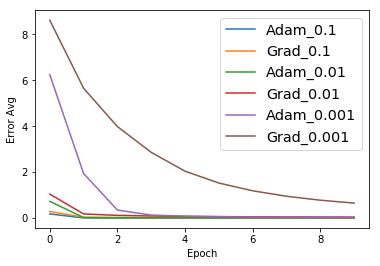

In [20]:
    print('normal = 0.1인 데이터에 대한 결과')  
    plt.xlabel('Epoch')
    plt.ylabel('Error Avg')
    
    plt.plot(x1_1,label = 'Adam_0.1')
    plt.plot(x2_1,label = 'Grad_0.1')
    plt.plot(x1_2,label = 'Adam_0.01')
    plt.plot(x2_2,label = 'Grad_0.01')
    plt.plot(x1_3,label = 'Adam_0.001')
    plt.plot(x2_3,label = 'Grad_0.001')
    plt.legend(fontsize='x-large')
    plt.show()

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

learning_rate1 = 0.1
learning_rate2 = 0.01
learning_rate3 = 0.001

point_class = 8

indices = [0,1,2,3,4,5,6,7]

print(tf.one_hot(indices=indices,depth=8))

class Model_Grad:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3])
            self.Y = tf.placeholder(tf.float32, [None, 8])

            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


class Model_Adam:
    def __init__(self, sess, name, learning_rate):
        self.sess = sess
        self.name = name
        self.learning_rate = learning_rate
        self._build_net()

    def _build_net(self):
        with tf.variable_scope(self.name):
            self.X = tf.placeholder(tf.float32, [None, 3])  # 데이터를 저장하는 일종의 통
            self.Y = tf.placeholder(tf.float32, [None, 8])

            W1 = tf.Variable(tf.random_normal([3, 24]))
            b1 = tf.Variable(tf.random_normal([24]))

            W2 = tf.Variable(tf.random_normal([24, 8]))
            b2 = tf.Variable(tf.random_normal([8]))

            h1 = tf.matmul(self.X, W1) + b1

            self.logits = tf.matmul(h1, W2) + b2

        # define cost/loss & optimizer
        self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
            logits=self.logits, labels=self.Y))
        self.optimizer = tf.train.AdamOptimizer(
            learning_rate=self.learning_rate).minimize(self.cost)

        correct_prediction = tf.equal(
            tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
        self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    def predict(self, x_test):
        return self.sess.run(self.logits, feed_dict={self.X: x_test})

    def get_accuracy(self, x_test, y_test):
        return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test})

    def train(self, x_data, y_data):
        return self.sess.run([self.cost, self.optimizer], feed_dict={
            self.X: x_data, self.Y: y_data})


if __name__ == "__main__":
    X = tf.placeholder(tf.float32, [None, 3])
    Y = tf.placeholder(tf.float32, [None, 8])# 0 ~ 7

    W1 = tf.Variable(tf.random_normal([3, 24]))
    b1 = tf.Variable(tf.random_normal([24]))

    W2 = tf.Variable(tf.random_normal([24, 8]))
    b2 = tf.Variable(tf.random_normal([8]))

    batch = 100
    epoch = 10
    startNumber = 0

    data = np.loadtxt('TrainDataset.csv', delimiter=',', dtype=np.float32)
    train_x_data = data[:, 0:-1]
    train_y_data = data[:, [-1]]

    data = np.loadtxt('TrainDataset_03.csv', delimiter=',', dtype=np.float32)
    train_x_data_03 = data[:, 0:-1]
    train_y_data_03 = data[:, [-1]]

    #print(train_y_data_onehot_03)
    print("데이터 총 개수 : ", len(train_y_data_03))

    maxBatch = int(len(train_x_data) / batch)

    print("batch size   = ", batch)
    print("batch Number = ", maxBatch)
    count = 0
    sess = tf.Session()
    train_y_data_onehot = tf.reshape(tf.one_hot(train_y_data,point_class),[-1,point_class]).eval(session=sess)
    train_y_data_03_onehot = tf.reshape(tf.one_hot(train_y_data_03,point_class),[-1,point_class]).eval(session=sess)
    m1_1 = Model_Adam(sess, "m1_1", learning_rate1)
    m2_1 = Model_Grad(sess, "m2_1", learning_rate1)
    m1_2 = Model_Adam(sess, "m1_2", learning_rate2)
    m2_2 = Model_Grad(sess, "m2_2", learning_rate2)
    m1_3 = Model_Adam(sess, "m1_3", learning_rate3)
    m2_3 = Model_Grad(sess, "m2_3", learning_rate3)

    x1_1 = []
    x2_1 = []
    x1_2 = []
    x2_2 = []
    x1_3 = []
    x2_3 = []

    sess.run(tf.global_variables_initializer())

    for i in range(epoch):  # 10 번 반복
        Eavg = 0.
        Eavg2 = 0.
        Eavg_2 = 0.
        Eavg2_2 = 0.
        Eavg_3 = 0.
        Eavg2_3 = 0.
        startNumber = 0
        for j in range(maxBatch):  # 200번 반복
            x_batch = train_x_data[startNumber:startNumber + 100]
            y_batch = train_y_data_onehot[startNumber:startNumber + 100]
            x_batch2 = train_x_data_03[startNumber:startNumber + 100]
            y_batch2 = train_y_data_03_onehot[startNumber:startNumber + 100]
            if (len(x_batch) != 0):
                cost_val, _ = m1_1.train(x_batch2, y_batch2)
                cost_val2, _ = m2_1.train(x_batch2, y_batch2)
                cost_val_2, _ = m1_2.train(x_batch2, y_batch2)
                cost_val2_2, _ = m2_2.train(x_batch2, y_batch2)
                cost_val_3, _ = m1_3.train(x_batch2, y_batch2)
                cost_val2_3, _ = m2_3.train(x_batch2, y_batch2)
                Eavg += cost_val
                Eavg2 += cost_val2
                Eavg_2 += cost_val_2
                Eavg2_2 += cost_val2_2
                Eavg_3 += cost_val_3
                Eavg2_3 += cost_val2_3
                startNumber = startNumber + 100
            else:
              break
        print("Epoch ", i + 1, "Eavg_Adam_1 : ", Eavg / maxBatch)
        x1_1.append(Eavg / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_1 : ", Eavg2 / maxBatch)
        x2_1.append(Eavg2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_2 / maxBatch)
        x1_2.append(Eavg_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_2 / maxBatch)
        x2_2.append(Eavg2_2 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Adam_2 : ", Eavg_3 / maxBatch)
        x1_3.append(Eavg_3 / maxBatch)
        print("Epoch ", i + 1, "Eavg_Grad_2 : ", Eavg2_3 / maxBatch)
        x2_3.append(Eavg2_3 / maxBatch)


Tensor("one_hot_20:0", shape=(8, 8), dtype=float32)
데이터 총 개수 :  20000
batch size   =  100
batch Number =  200
Epoch  1 Eavg_Adam_1 :  0.5385383388400078
Epoch  1 Eavg_Grad_1 :  0.9758304803073407
Epoch  1 Eavg_Adam_2 :  1.2797497732937335
Epoch  1 Eavg_Grad_2 :  3.958085179924965
Epoch  1 Eavg_Adam_2 :  5.568872870206833
Epoch  1 Eavg_Grad_2 :  7.001482923030853
Epoch  2 Eavg_Adam_1 :  0.4192164024710655
Epoch  2 Eavg_Grad_1 :  0.38999656088650225
Epoch  2 Eavg_Adam_2 :  0.38944145254790785
Epoch  2 Eavg_Grad_2 :  0.7370700672268867
Epoch  2 Eavg_Adam_2 :  1.6873304563760758
Epoch  2 Eavg_Grad_2 :  4.625723583698273
Epoch  3 Eavg_Adam_1 :  0.41430861569941047
Epoch  3 Eavg_Grad_1 :  0.38002276815474034
Epoch  3 Eavg_Adam_2 :  0.37975723229348657
Epoch  3 Eavg_Grad_2 :  0.5269061155617237
Epoch  3 Eavg_Adam_2 :  0.7235557878017426
Epoch  3 Eavg_Grad_2 :  3.3733653223514555
Epoch  4 Eavg_Adam_1 :  0.4116644601523876
Epoch  4 Eavg_Grad_1 :  0.37753298111259936
Epoch  4 Eavg_Adam_2 :  0.37

In [42]:
    test = np.loadtxt('TestDataset_03.csv', delimiter=',', dtype=np.float32)
    test_x_data_03 = test[:, 0:-1]
    test_y_data_03 = test[:, [-1]]
    test_y_data_onehot = tf.reshape(tf.one_hot(test_y_data_03, point_class), [-1, point_class]).eval(session=sess)
    startNumber = 0
    Aavg = 0.
    Aavg2 = 0.
    Aavg_2 = 0.
    Aavg2_2 = 0.
    Aavg_3 = 0.
    Aavg2_3 = 0.
    a = 0
    print("batch: ", batch)
    for i in range(len(test_x_data_03)):  # 200번 반복
        x_batch2 = test_x_data_03[startNumber:startNumber + batch]
        y_batch2 = test_y_data_onehot[startNumber:startNumber + batch]
        if (len(x_batch2) != 0):
            accuracy = m1_1.get_accuracy(x_batch2, y_batch2)
            accuracy2 = m2_1.get_accuracy(x_batch2, y_batch2)
            accuracy_2 = m1_2.get_accuracy(x_batch2, y_batch2)
            accuracy2_2 = m2_2.get_accuracy(x_batch2, y_batch2)
            accuracy_3 = m1_3.get_accuracy(x_batch2, y_batch2)
            accuracy2_3 = m2_3.get_accuracy(x_batch2, y_batch2)
            Aavg = Aavg + accuracy
            Aavg2 = Aavg2 + accuracy2
            Aavg_2 += accuracy_2
            Aavg2_2 += accuracy2_2
            Aavg_3 += accuracy_3
            Aavg2_3 += accuracy2_3
            startNumber = startNumber + 100
        else:
            break

    print("Adam 0.1 : {}%".format((float(Aavg) / len(test_x_data_03)) * 100))
    print("Grad 0.1 : {:.4f}%".format((float(Aavg2) / len(test_x_data_03)) * 100))
    print("Adam 0.01 : {}%".format((float(Aavg_2) / len(test_x_data_03)) * 100))
    print("Grad 0.01 : {:.4f}%".format((float(Aavg2_2) / len(test_x_data_03)) * 100))
    print("Adam 0.001 : {}%".format((float(Aavg_3) / len(test_x_data_03)) * 100))
    print("Grad 0.001 : {:.4f}%".format((float(Aavg2_3) / len(test_x_data_03)) * 100))

batch:  100
Adam 0.1 : 0.8339999914169313%
Grad 0.1 : 0.8310%
Adam 0.01 : 0.8329999923706055%
Grad 0.01 : 0.8310%
Adam 0.001 : 0.8330000042915344%
Grad 0.001 : 0.7310%


normal = 0.3인 데이터에 대한 결과


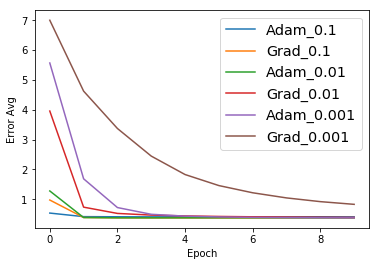

In [36]:
    #최적화 기법에 따른 결과 
    print('normal = 0.3인 데이터에 대한 결과')
    plt.xlabel('Epoch')
    plt.ylabel('Error Avg')
    
    plt.plot(x1_1,label = 'Adam_0.1')
    plt.plot(x2_1,label = 'Grad_0.1')
    plt.plot(x1_2,label = 'Adam_0.01')
    plt.plot(x2_2,label = 'Grad_0.01')
    plt.plot(x1_3,label = 'Adam_0.001')
    plt.plot(x2_3,label = 'Grad_0.001')
    plt.legend(fontsize='x-large')
    plt.show()

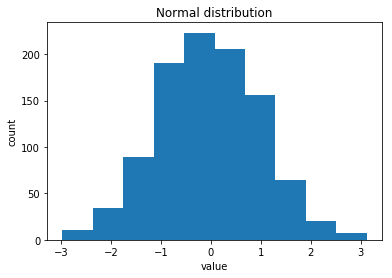

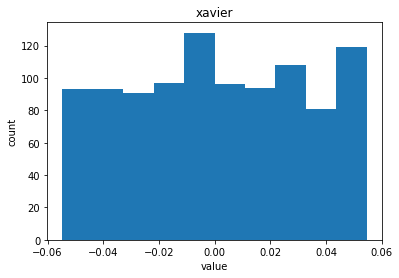

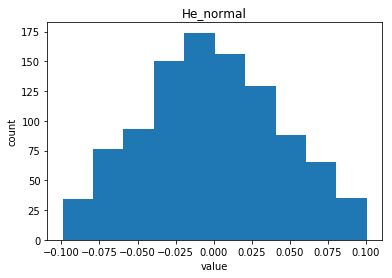

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

A1 = tf.Variable(tf.random_normal([1000])) # 정규 분포
tf.get_variable_scope().reuse_variables()
A2 = tf.get_variable("AA2", shape=[1000], initializer=tf.contrib.layers.xavier_initializer()) # xavier초기화
A3 = tf.get_variable("AA3", shape=[1000], initializer=tf.compat.v1.initializers.he_normal()) # he_정규분포 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
A1_value = sess.run(A1)
A2_value = sess.run(A2)
A3_value = sess.run(A3)


plt.title('Normal distribution')
plt.xlabel('value')
plt.ylabel('count')
plt.hist(A1_value)
plt.show()

plt.title('xavier')
plt.xlabel('value')
plt.ylabel('count')
plt.hist(A2_value)
plt.show()



plt.title('He_normal')
plt.xlabel('value')
plt.ylabel('count')
plt.hist(A3_value)
plt.show()



#https://www.tensorflow.org/api_docs/python/tf/contrib/layers/xavier_initializer
#https://www.tensorflow.org/api_docs/python/tf/initializers/he_normal